# Project 1: Electron Plasma Waves

In this project, we are going to look at the dispersion relation for electron plasma waves.

The dispersion relation, $\omega(k)$, tells us the natural frequencies of oscillations for these waves, and the information contained in this function about the relationship between $\omega$ and $k$ can be used to determine the phase and group velocities of these waves.  [There will be a subsequent notebook on wave velocities]

Take the following simple case:

* $\nabla \times \vec{E} = 0$ -- Longitudinal (electrostatic) waves  

* $T_i = T_e = 0$ -- Cold plasma  

* $\vec{B}_0 = 0$ -- Unmagnetized

The time derivative of Ampere's law in the unmagnetized case gives:

$$ \frac{\partial^2}{\partial t^2}\vec{E} + \frac{en_0}{\epsilon_0}\left[\frac{\partial \vec{v}_i}{\partial t} - \frac{\partial \vec{v}_e}{\partial t}\right] = 0 $$

Using Euler's equation, $\partial \vec{v} / \partial t = (q/m)(\partial \vec{E} / \partial t)$,

$$ \frac{\partial^2}{\partial t^2}\vec{E} + \frac{e^2 n_0}{\epsilon_0}\left[\frac{1}{m_i} + \frac{1}{m_e}\right]\vec{E} = 0 $$

and by using the plasma frequency definitions,

$$\Omega_p^2 = \frac{e^2n_0}{\epsilon_0 m_i} \text{    and    } \omega_p^2 = \frac{e^2n_0}{\epsilon_0 m_e}$$

we have

$$ \frac{\partial^2}{\partial t^2}\vec{E} + [\Omega_p^2 + \omega_p^2]\vec{E} = 0 $$


This is our familiar harmonic oscillator equation.

In a hydrogen plasma with $m_i = 1836 m_e$, the frequency is dominated by the electron plasma frequency:  $\omega_p^2 + \Omega_p^2 = \omega_p^2 [ 1 + m_e/m_i ] \approx \omega_p^2$, and in this case,

$$ \frac{\partial^2}{\partial t^2}\vec{E} + \omega_p^2\vec{E} = 0 $$

To Fourier Analyze the equation (and make it an algebraic equation to solve rather than a partial differential equation), we substitute in $\vec{E} = \vec{\bar{E}} e^{i\omega t}$, giving

$$ [-\omega^2 + \omega_p^2]\vec{\bar{E}}e^{i\omega t} = 0 $$

This equation leads quite simply to the dispersion relation:

$$ \omega^2 = \omega_p^2 $$

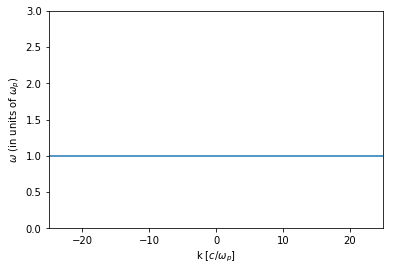

In [1]:
#
# Plotting w(k) = w_p
# Rather straightforward, since there is no dependence on k
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-25,25,100)
y = np.ones(100)
plt.plot(x,y)
plt.xlabel('k [$c/\omega_p$]'); plt.ylabel('$\omega$ (in units of $\omega_p$)'); plt.xlim(-25,25); plt.ylim(0,3)
plt.show()

The frequency of oscillation for waves under these plasma conditions is $\omega = \pm \omega_p$, and we see that there is no dependence on $k$.

There can be a spatial variation to the waves, because $\vec{\bar{E}}$ can be an arbitrary function of position, and we can have $\vec{E} = \vec{\bar{E}}(\vec{x})e^{i\omega_p t}$ as long as we satisfy our initial assumption that $\nabla \times \vec{E} = 0$.

Since there is no dependence on $k$, at each location the fields oscillate at $\omega_p$ independently of the other positions.

It is possible to phase these oscillations into a wave $\vec{E} = \bar{E}e^{i(kx-\omega_p t)}\hat{x}$ where $k$ is arbitrary.

$$v_{\phi} = \omega/k = \omega_p/k$$ and can take on arbitrary values depending on $k$.  $$v_g = \partial\omega/\partial k = 0$$ and the waves cannot transport any information.

This case is interesting but rather basic.  Once we introduce a temperature to the plasma, there is a frequency dependence on the wavenumber.

In [2]:
#
# Moving on to warm plasma
#
# This animation shows electrons (blue) oscillating against a fixed ion background (red).
#
from IPython.display import IFrame
IFrame(src="Langmuir_wave.gif",width=300,height=300)  # retrieved from http://space.irfu.se/~andris/plasma/waves/Langmuir_wave.gif

## Electron plasma waves in a warm plasma

We'll still assume:

* $\nabla \times \vec{E} = 0$ -- Longitudinal (electrostatic) waves  

* $\vec{B}_0 = 0$ -- Unmagnetized

but now

* $T_e \neq 0$ -- Warm fluid  

And from the start we'll assume that the ions do not move.

Here the time derivative of Ampere's law in the unmagnetized case gives:

$$ \frac{\partial^2}{\partial t^2}\vec{E} - \frac{en_0}{\epsilon_0}\frac{\partial \vec{v}_e}{\partial t} = 0 $$

And using Euler's equation in a warm plasma now gives:

$$ \frac{\partial^2}{\partial t^2}\vec{E} - \frac{e n_0}{\epsilon_0}\left[-\frac{e}{m_e}\vec{E} - \frac{\gamma k T_e}{m_e n_0}\nabla n_1\right] = 0 $$

To get the wave equation for $\vec{E}$, we must find $n_1$ in terms of $E$.  To do this we use Gauss' Law:

$$\nabla \cdot \vec{E} = -\frac{e n_1}{\epsilon}$$

so

$$\nabla n_1 = -\frac{\epsilon_0}{e} \nabla(\nabla \cdot \vec{E}) = -\frac{\epsilon_0}{e} \nabla^2 \vec{E}$$

where we used the fact that $\nabla(\nabla \cdot \vec{E}) = \nabla^2 \vec{E}$ when $\nabla \times \vec{E} = 0$.

Now we can write the equation purely in terms of $\vec{E}$:

$$ \frac{\partial^2}{\partial t^2}\vec{E} + \frac{e^2 n_0}{m_e \epsilon_0}\vec{E} - \frac{\gamma k T_e}{m_e}\nabla^2\vec{E} = 0 $$

For high frequency waves there is no time for any heat loss and we use $\gamma = 3$, i.e., the adiabatic equation of state for these 1D longitudinal oscillations.  $\gamma = 3$ also follows from a more rigorous kinetic treatment.  We can also substitute in $\omega_p$ and $v_{the}$.

$$ \frac{\partial^2}{\partial t^2}\vec{E} + \omega_p^2\vec{E} - 3 v_{the}^2\nabla^2\vec{E} = 0 $$

Fourier Analyzing with $\vec{E} = \vec{\bar{E}}e^{i(kx-\omega t)}$,

$$ [-\omega^2 + \omega_p^2 + 3 v_{the}^2 k^2]\vec{\bar{E}}e^{i(kx-\omega t)} = 0 $$

giving the dispersion relation:

$$ \omega^2 = \omega_p^2 + 3 v_{the}^2 k^2 $$

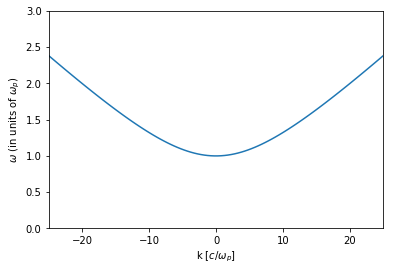

In [3]:
#
# Plotting w(k) = sqrt[w_p^2 + 3 * v_the^2 * k^2]
# We assume here that w_p = 1.0 and v_the/c = 0.05
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-25,25,100)
y = np.sqrt(1 + 3 * 0.05**2 * x**2)
plt.plot(x,y)
plt.xlabel('k [$c/\omega_p$]'); plt.ylabel('$\omega$ (in units of $\omega_p$)'); plt.xlim(-25,25); plt.ylim(0,3)
plt.show()

# Simulations with a Particle-in-Cell Code

In this project, you will be simulating plasmas in which each plasma electron is initialized with positions (only in x, or what we call $x_1$) such that the density is uniform. The ions are initialized at the same positions but they have an infinite mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their current and charge density produce.

* The length of the plasmas is 50 $c/\omega_p$
* The simulation will run for a time 400 $1/\omega_p$.
* The simulation uses 50,000 particles.

You will be looking at plots of the electric field in the $x_1$ direction, $E_1$. 

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

In [1]:
import osiris
%matplotlib inline

## Run a case in which $vth_1=vth_2=vth_3=0.02 c$.

In [2]:
# vth/c = 0.02
dirname = 'v02'
osiris.runosiris(rundir=dirname,inputfile='v02.txt')

/home/jovyan/notebooks/electron-plasma-wave-dispersion/v02


CalledProcessError: Command '['osiris-1D.e', '-w', '/home/jovyan/notebooks/electron-plasma-wave-dispersion/v02', 'osiris-input.txt']' returned non-zero exit status 127.

After the simulation is finished, plot $E_1(x_1)$ at $t \approx 100$ (run the next cell). 
* Do you see any evidence of a plasma wave or oscillation? 
* Does the plot make sense?

In [ ]:
dirname = 'v02'
osiris.field(rundir=dirname,time=100)

Next, plot $E_1(t)$ at $x_1=5 c/\omega_p$ (i.e., at cell=100). 
* Do you see any evidence of a plasma wave or oscillation? 
* Does the plot make sense?

In [ ]:
dirname = 'v02'
osiris.field(rundir=dirname,space=100)

Next, in the following two cells, we are going to plot $\omega(k)$.  This is generated by taking $E_1(x_1,t)$ and Fourier analyzing in both position and time.

-------
* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'v02'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.02, vmin=-1, vmax=3)
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.02, vmin=-1, vmax=3, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'v02'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,0.5], vth = 0.02, vmin=-2, vmax=3, show_theory=True, debye=True) 

##### I would like you to think about units:
* What do you think are the natural units for $\omega$? 
* What about k? 

We are plotting them in what are called normalized units (not inverse time or inverse distance). We use two choices ($\omega/\omega_p$ and $kc/\omega_p$) and ($\omega/\omega_p$ and $kv_{th}/\omega_p = k\lambda_D$).

We also plot the theory curve:
* Does it make sense? 
* Why do you think it agrees better for smaller wave numbers?
* At what wave number does the theory plot stop working as well? 
* Can you explain why this happens?

## Run a case in which $vth_1=vth_2=vth_3=0.05 c$.

In [ ]:
# vth/c = 0.05
dirname = 'v05'
osiris.runosiris(rundir=dirname,inputfile='v05.txt')

Make $\omega(k)$ plots for this case by running the cells below.

* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'v05'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.05, vmin=-1, vmax=3)
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.05, vmin=-1, vmax=3, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'v05'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,0.5], vth = 0.05, vmin=-2, vmax=3, show_theory=True, debye=True) 

### Questions
* Do the $\omega(k)$ plots make sense? 
* For which normalized units do the plots look similar to case b?

## Run a case in which $vth_1=vth_2=vth_3=0.20 c$.

In [ ]:
# vth/c = 0.2
dirname = 'v20'
osiris.runosiris(rundir=dirname,inputfile='v20.txt')

Make $\omega(k)$ plots for this case by running the cells below.

* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'v20'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.20, vmin=0, vmax=5)
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,25], vth = 0.20, vmin=0, vmax=5, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'v20'
osiris.plot_wk(rundir=dirname, wlim=[0,2], klim=[0,0.5], vth = 0.20, vmin=0, vmax=5, show_theory=True, debye=True)

### Questions

* Do the $\omega(k)$ plots make sense? 

* For which normalized units do the plots look similar to case a and b?

* Look closely at $k=0$. The frequency does not agree with theory as well as for cases a and b. 
 * Is it higher or lower than theory? 
 * Can you think of a reason why?